#### Create your own dataset using WebScraping and perform Data Analysis on it

#### Approach You Can Follow :

- Decide on to the topic / use-case you’re willing to analyze

- You can use BeautifulSoup, Scrapy, requests library, selectorlib library, smtplib library, PYPDF2 and many more according to your convenience

- Find your Source and Data Features from various websites

- Scrape and extract the data from WebPages in any compatible format

- Prepare the data good enough for better analysis and set it in an aligned structure

- Perform the Data Analysis by comparing and measuring the features that displays the insights gathered

#### What Kind Of Approach You Could Follow for your Problem Statements :

- Scraping the Web, Pre-Processing, Data Cleaning and Exploratory Data Analysis 

- Hints provided are only for your references or getting started. You’re free to use your own methodology to work on your assignments.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

import time

In [2]:
URL = 'https://www.worldometers.info/world-population/population-by-country/'

In [3]:
page = requests.get(URL)
page.status_code

200

In [4]:
soup = BeautifulSoup(page.content,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Population by Country (2023) - Worldometer
  </title>
  <meta content="List of countries and dependencies in the world ranked by population, from the most populated. Growth rate, median age, fertility rate, area, density, population density, urbanization, urban population, share of world population." name="description"/>
  <!-- Favicon -->
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="ap

In [5]:
table = soup.find('table',{'id':'example2'})

In [6]:
tbody = table.find('tbody')

In [7]:
rows = tbody.find_all('tr')

In [11]:
country = []
population = [] 
yearly_change = []
net_change = []
density = []
land_area = []
migrants = []
fert_rate = []
med_age = []
urban_Pop = []
world_share = []

for row in rows:
    
    Country = row.find_all('td')[1].text
    if len(Country)==0:
        country.append('Not available')
    else:
        country.append(Country)
    
    Population = row.find_all('td')[2].text
    if len(Population) == 0:
        population.append('0')
    else:
        population.append(Population)
    
    Yearly_change = row.find_all('td')[3].text
    if len(Yearly_change)==0:
        yearly_change.append('0.0')
    else:
        yearly_change.append(Yearly_change)
    
    Net_change = row.find_all('td')[4].text
    if len(Net_change)==0:
        net_change.append('0')
    else:
        net_change.append(Net_change)
    
    Density = row.find_all('td')[5].text
    if len(Density)==0:
        density.append('0')
    else:
        density.append(Density)
    
    Land_area = row.find_all('td')[6].text
    if len(Land_area)==0:
        land_area.append(0)
    else:
        land_area.append(Land_area)
    
    Migrants = row.find_all('td')[7].text
    if len(Migrants)==0:
        migrants.append('0')
    else:
        migrants.append(Migrants)
    
    Fert_rate = row.find_all('td')[8].text
    if len(Fert_rate)==0:
        fert_rate.append('0.0')
    else:
        fert_rate.append(Fert_rate)
    
    Med_age = row.find_all('td')[9].text
    if len(Med_age)==0:
        med_age.append('0')
    else:
        med_age.append(Med_age)
    
    Urban_Pop = row.find_all('td')[10].text
    if len(Urban_Pop)==0:
        urban_Pop.append('0')
    else:
        urban_Pop.append(Urban_Pop)
    
    World_share = row.find_all('td')[11].text
    if len(World_share)==0:
        World_share.append('0.0')
    else:
        world_share.append(World_share)
        
print(len(country))
print(len(population)) 
print(len(yearly_change))
print(len(net_change))
print(len(density))
print(len(land_area))
print(len(migrants))
print(len(fert_rate))
print(len(med_age))
print(len(urban_Pop))
print(len(world_share))


235
235
235
235
235
235
235
235
235
235
235


In [61]:
data = {'Country':country, 'Population (2020)':population, 'Yearly Change':yearly_change,
'Net change':net_change, 'Density (P/km)':density, 'Land Area (sq Km)':land_area, 'Migrants (net)':migrants, 'Fert. rate':fert_rate, 'Med. Age':med_age,
'Urban Pop %':urban_Pop, 'World Share':world_share,}

df = pd.DataFrame(data)

In [84]:
df.head()

,Country,Population (2020),Yearly Change,Net change,Density (P/km),Land Area (sq Km),Migrants (net),Fert. rate,Med. Age,Urban Pop %,World Share
0,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61 %,18.47 %
1,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35 %,17.70 %
2,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83 %,4.25 %
3,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56 %,3.51 %
4,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35 %,2.83 %


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            235 non-null    object
 1   Population (2020)  235 non-null    object
 2   Yearly Change      235 non-null    object
 3   Net change         235 non-null    object
 4   Density (P/km)     235 non-null    object
 5   Land Area (sq Km)  235 non-null    object
 6   Migrants (net)     235 non-null    object
 7   Fert. rate         235 non-null    object
 8   Med. Age           235 non-null    object
 9   Urban Pop %        235 non-null    object
 10  World Share        235 non-null    object
dtypes: object(11)
memory usage: 20.3+ KB


In [64]:
df['Population (2020)'] = df['Population (2020)'].str.replace(',','').astype(int)

In [ ]:
df['Yearly Change'] = df['Yearly Change'].str.replace('%','').astype(float)

In [66]:
df['Net change'] = df['Net change'].str.replace(',','').astype(int)

In [67]:
df['Land Area (sq Km)'] = df['Land Area (sq Km)'].str.replace(',','').astype(int)

In [68]:
df['Migrants (net)'] = df['Migrants (net)'].str.replace(',','')

In [81]:
df['Migrants (net)'] = df['Migrants (net)'].replace(' ', '0').astype(int)

In [87]:
df['Fert. rate'] = df['Fert. rate'].replace('N.A.','0.0').astype(float)

In [90]:
df['Med. Age'] = df['Med. Age'].replace('N.A.','0').astype(int)

In [117]:
df['Urban Pop %'] = df['Urban Pop %'].str.replace('%','')

In [120]:
df['Urban Pop %'] = df['Urban Pop %'].replace('N.A.','0').astype(float)

In [ ]:
df['World Share'] = df['World Share'].str.replace('%','')

In [113]:
df['Density (P/km)'] = df['Density (P/km)'].str.replace(',','').astype(int)

In [126]:
df['World Share %'] = df['World Share %'].astype(float) 

In [108]:
df.rename(columns = {'Yearly Change':'Yearly Change %'}, inplace = True)
df.rename(columns = {'World Share':'World Share %'}, inplace = True)

In [128]:
df.head()

,Country,Population (2020),Yearly Change %,Net change,Density (P/km),Land Area (sq Km),Migrants (net),Fert. rate,Med. Age,Urban Pop %,World Share %
0,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61.0,18.47
1,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35.0,17.70
2,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83.0,4.25
3,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56.0,3.51
4,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35.0,2.83


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            235 non-null    object 
 1   Population (2020)  235 non-null    int32  
 2   Yearly Change %    235 non-null    float64
 3   Net change         235 non-null    int32  
 4   Density (P/km)     235 non-null    int32  
 5   Land Area (sq Km)  235 non-null    int32  
 6   Migrants (net)     235 non-null    int32  
 7   Fert. rate         235 non-null    float64
 8   Med. Age           235 non-null    int32  
 9   Urban Pop %        235 non-null    float64
 10  World Share %      235 non-null    float64
dtypes: float64(4), int32(6), object(1)
memory usage: 14.8+ KB


In [132]:
df.isna().sum()

Country              0
Population (2020)    0
Yearly Change %      0
Net change           0
Density (P/km)       0
Land Area (sq Km)    0
Migrants (net)       0
Fert. rate           0
Med. Age             0
Urban Pop %          0
World Share %        0
dtype: int64

In [134]:
df.duplicated().sum()

0

In [137]:
df.to_csv('Population data.csv', index = False)

In [2]:
data = pd.read_csv('Population data.csv')

In [3]:
data.head()

,Country,Population (2020),Yearly Change %,Net change,Density (P/km),Land Area (sq Km),Migrants (net),Fert. rate,Med. Age,Urban Pop %,World Share %
0,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61.0,18.47
1,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35.0,17.70
2,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83.0,4.25
3,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56.0,3.51
4,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35.0,2.83


C:\Users\Jaseem Shaikh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Population (2020)', ylabel='Country'>

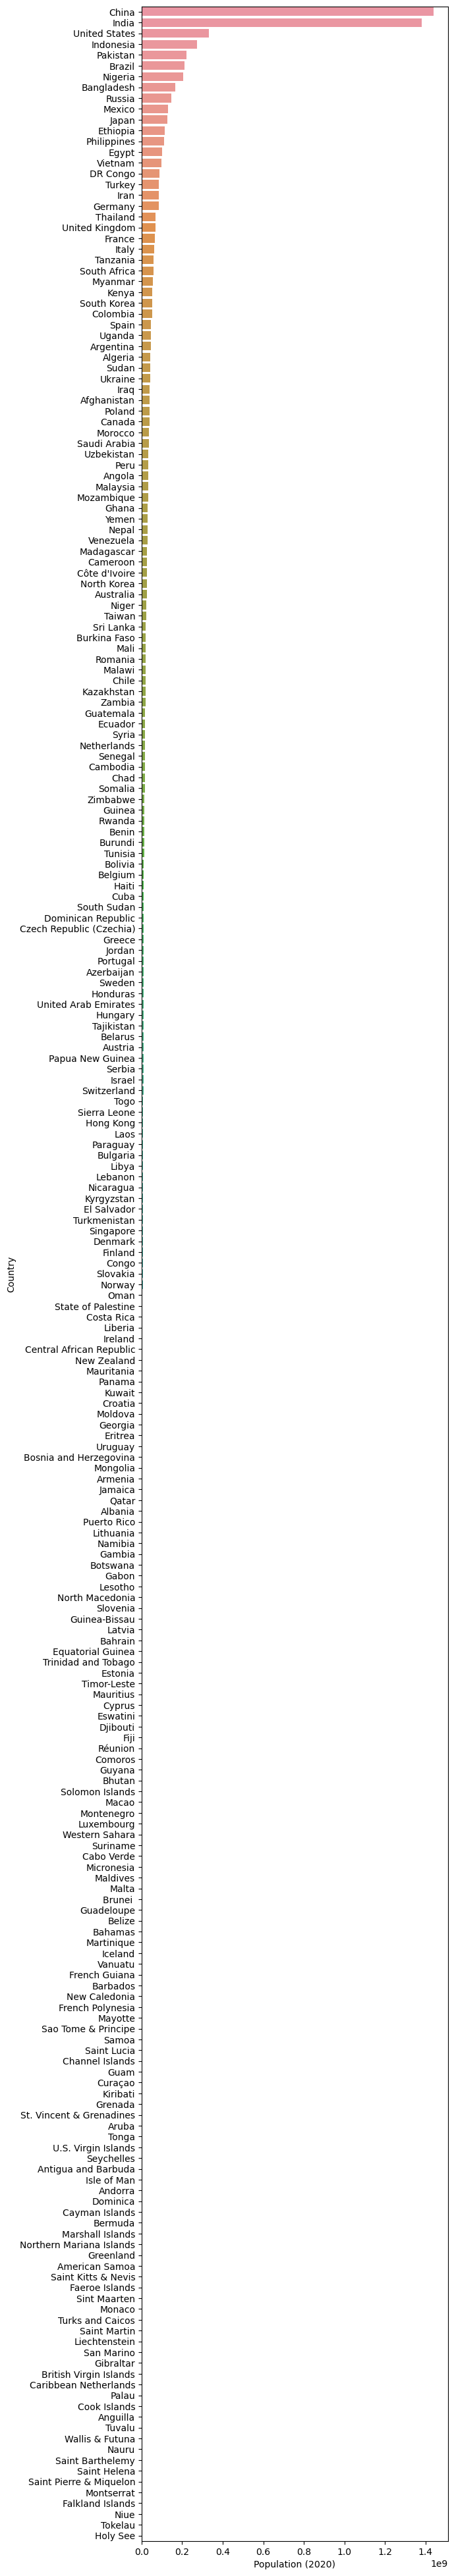

In [4]:
plt.figure(figsize = (6,50), dpi = 100)
sns.barplot('Population (2020)','Country', data = data)

#### China is having highest population whereas India is the second highest amoung all. 

C:\Users\Jaseem Shaikh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Net change', ylabel='Country'>

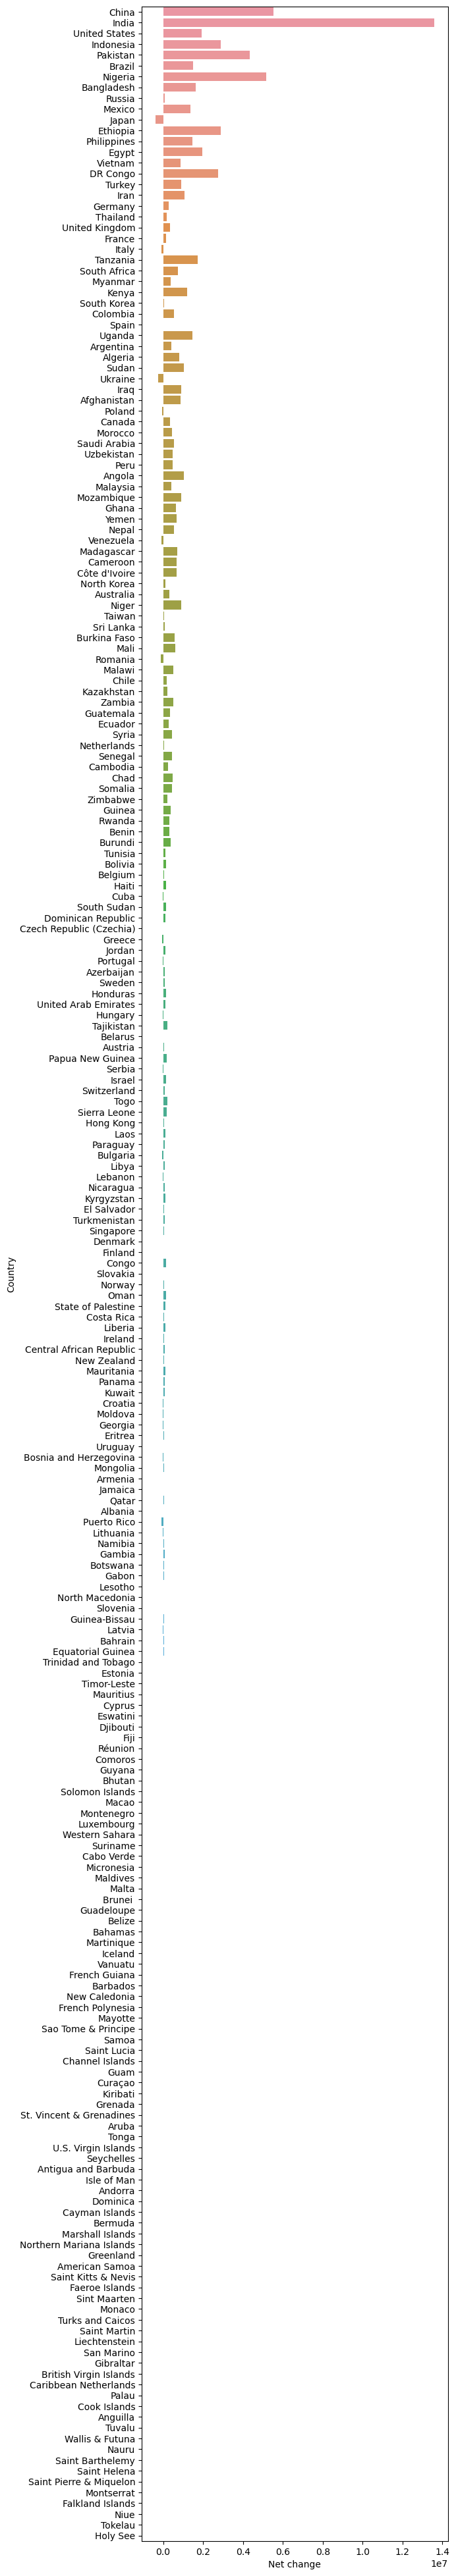

In [5]:
plt.figure(figsize = (6,50), dpi = 100)
sns.barplot('Net change','Country', data = data)

#### India is having highest net change amoung all countries

C:\Users\Jaseem Shaikh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Density (P/km)', ylabel='Country'>

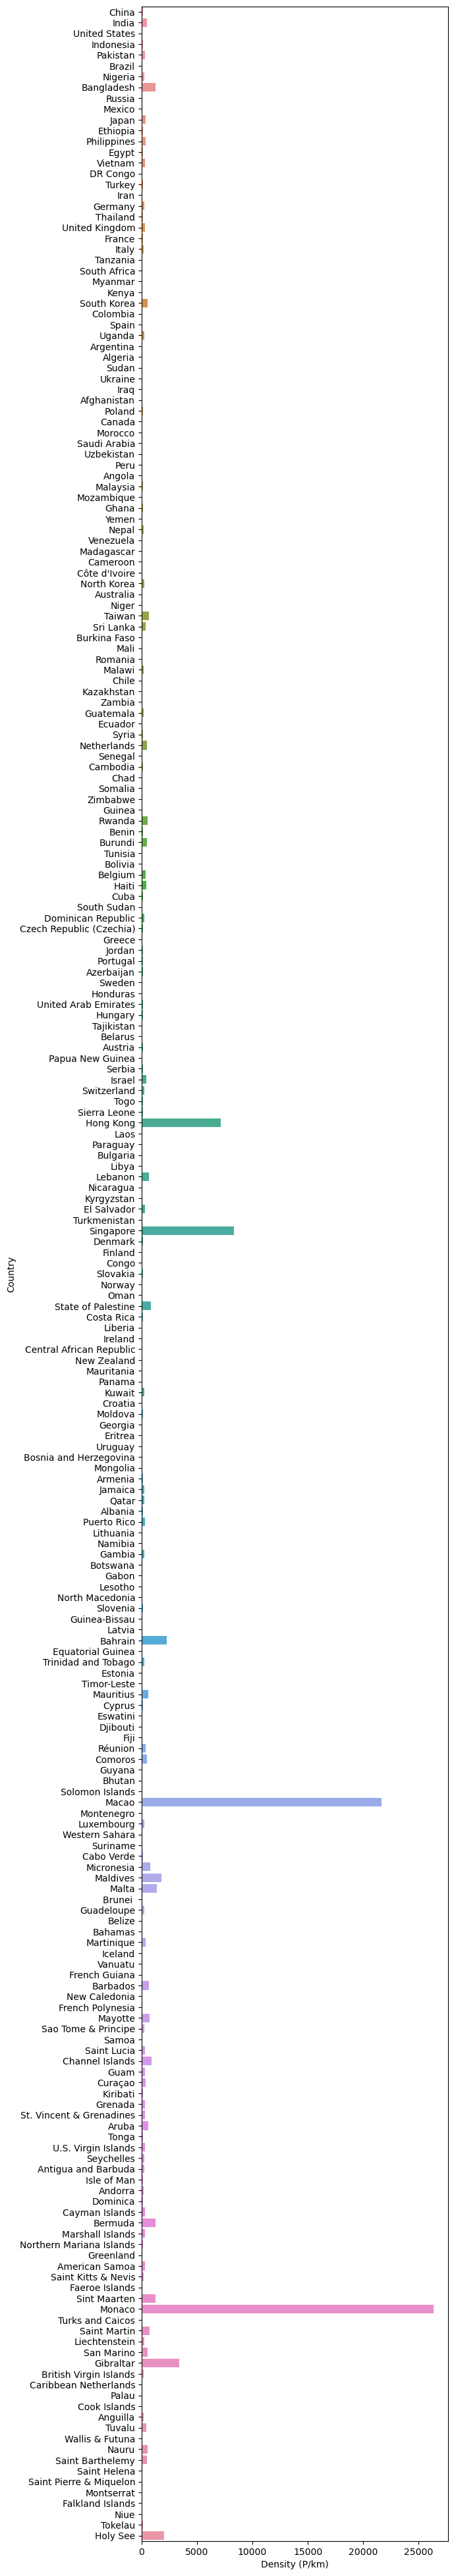

In [6]:
plt.figure(figsize = (6,50), dpi = 100)
sns.barplot('Density (P/km)','Country', data = data)

In [7]:
data.groupby('Country')['Density (P/km)'].mean().sort_values(ascending = False)

Country
Monaco              26337.0
Macao               21645.0
Singapore            8358.0
Hong Kong            7140.0
Gibraltar            3369.0
                     ...   
Namibia                 3.0
Western Sahara          2.0
Mongolia                2.0
Falkland Islands        0.0
Greenland               0.0
Name: Density (P/km), Length: 235, dtype: float64

#### Monaco country is having the highest density per km whereas Macao is the second highest among all.

C:\Users\Jaseem Shaikh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Land Area (sq Km)', ylabel='Country'>

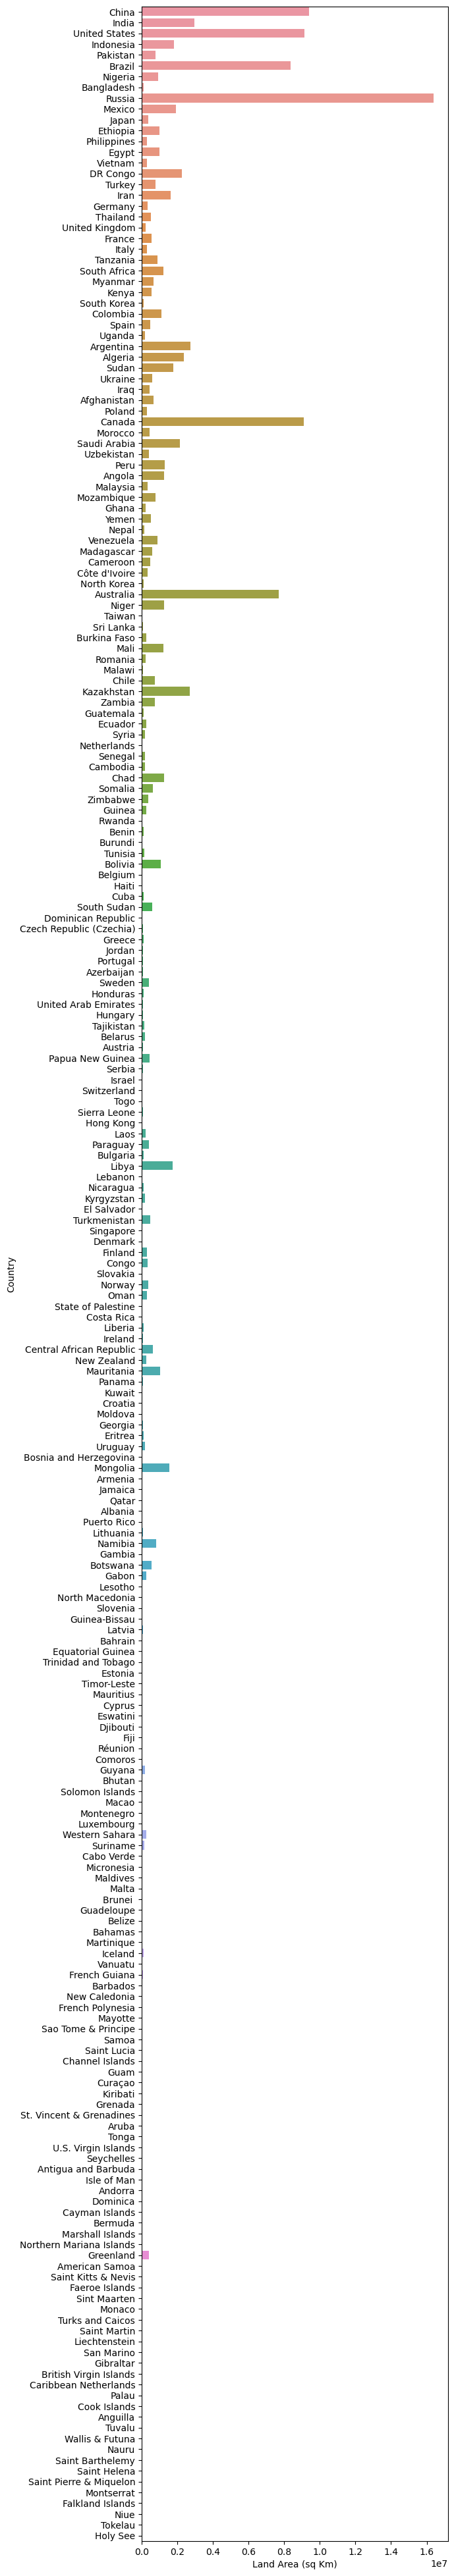

In [8]:
plt.figure(figsize = (6,50), dpi = 100)
sns.barplot('Land Area (sq Km)','Country', data = data)

In [9]:
data.groupby('Country')['Land Area (sq Km)'].mean().sort_values(ascending = False)

Country
Russia           16376870.0
China             9388211.0
United States     9147420.0
Canada            9093510.0
Brazil            8358140.0
                    ...    
Nauru                  20.0
Gibraltar              10.0
Tokelau                10.0
Monaco                  1.0
Holy See                0.0
Name: Land Area (sq Km), Length: 235, dtype: float64

#### Russia is the country having highest Land Area (sq Km).

C:\Users\Jaseem Shaikh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fert. rate', ylabel='Country'>

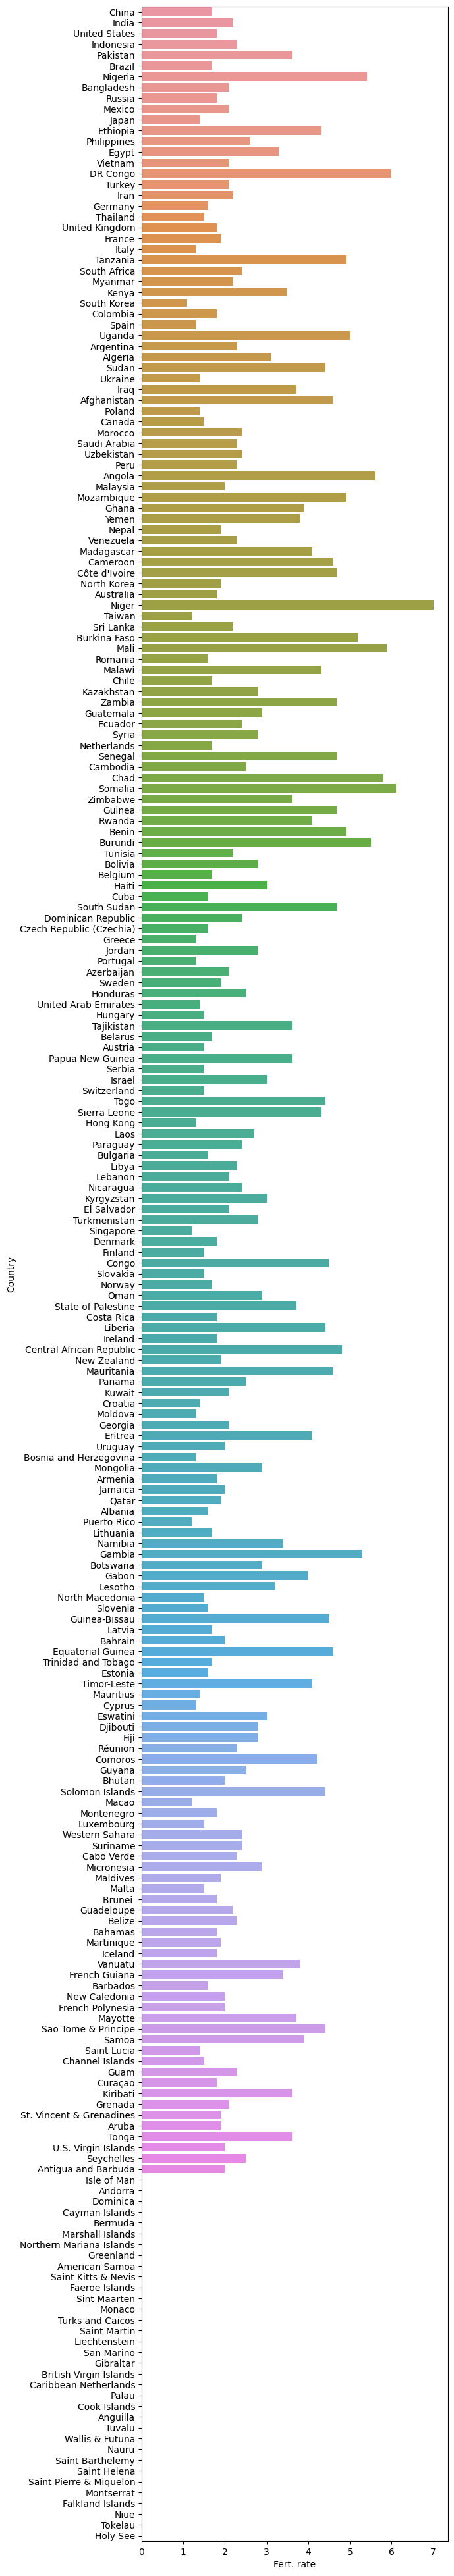

In [10]:
plt.figure(figsize = (6,50), dpi = 100)
sns.barplot('Fert. rate','Country', data = data)

In [11]:
data.groupby('Country')['Fert. rate'].mean().sort_values(ascending = False)

Country
Niger                    7.0
Somalia                  6.1
DR Congo                 6.0
Mali                     5.9
Chad                     5.8
                        ... 
Liechtenstein            0.0
Caribbean Netherlands    0.0
Isle of Man              0.0
Cayman Islands           0.0
Nauru                    0.0
Name: Fert. rate, Length: 235, dtype: float64

#### Niger is having the highest Fert. rate

C:\Users\Jaseem Shaikh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Urban Pop %', ylabel='Country'>

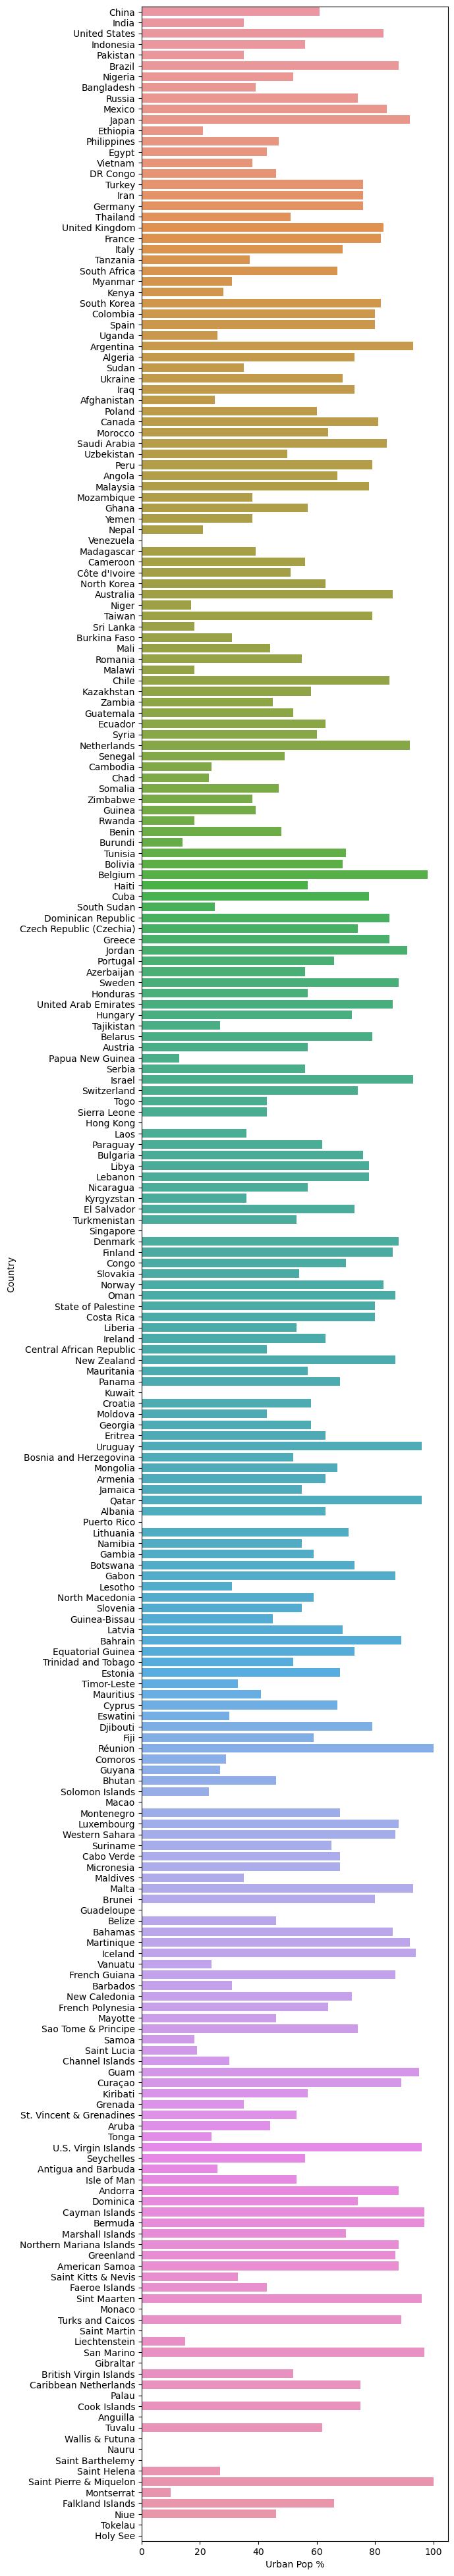

In [12]:
plt.figure(figsize = (6,50), dpi = 100)
sns.barplot('Urban Pop %','Country', data = data)

In [13]:
data.groupby('Country')['Urban Pop %'].mean().sort_values(ascending = False)

Country
Réunion                    100.0
Saint Pierre & Miquelon    100.0
Belgium                     98.0
San Marino                  97.0
Bermuda                     97.0
                           ...  
Hong Kong                    0.0
Tokelau                      0.0
Nauru                        0.0
Monaco                       0.0
Kuwait                       0.0
Name: Urban Pop %, Length: 235, dtype: float64

#### Réunion and Saint Pierre & Miquelon is having the 100 percent urban population

C:\Users\Jaseem Shaikh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='World Share %', ylabel='Country'>

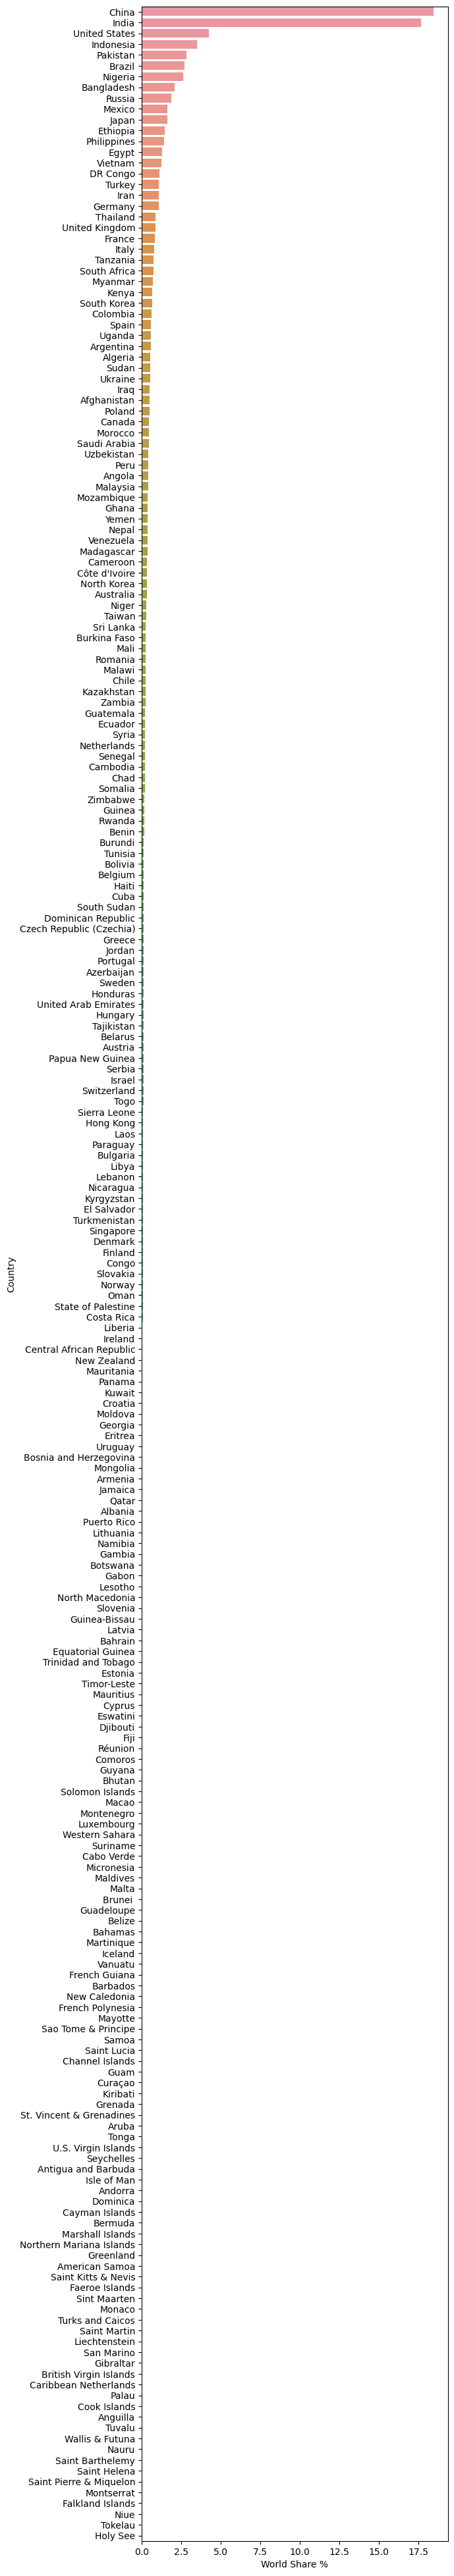

In [14]:
plt.figure(figsize = (6,50), dpi = 100)
sns.barplot('World Share %','Country', data = data)

In [15]:
data.groupby('Country')['World Share %'].mean().sort_values(ascending = False)

Country
China               18.47
India               17.70
United States        4.25
Indonesia            3.51
Pakistan             2.83
                    ...  
Cook Islands         0.00
Kiribati             0.00
Isle of Man          0.00
Bermuda              0.00
French Polynesia     0.00
Name: World Share %, Length: 235, dtype: float64

#### China contribute total 18.47 percent of world population whereas india contribute 17.70 percent

# Summary

#### India is having highest net change amoung all countries
#### Monaco country is having the highest density per km whereas Macao is the second highest among all.
#### Russia is the country having highest Land Area (sq Km).
#### Niger is having the highest Fert. rate
#### Réunion and Saint Pierre & Miquelon is having the 100 percent urban population
#### China contribute total 18.47 percent of world population whereas india contribute 17.70 percent